In [2]:
import pickle
import numpy as np
import pandas as pd

In [4]:
df_home = pickle.load(open('dataset1.pkl','rb'))

In [6]:
df_away = pickle.load(open('dataset2.pkl','rb'))

In [8]:
df_home.head()

,stadium,home_team,away_team,home_goals,Home Total shots,Home Shots on target,Home Big chances,Home Big chances missed,Home Accurate passes,Home Touches in opposition box,Home Offsides,Home Keeper saves,Home xG Created
0,Fuball Arena Mnchen,Germany,Scotland,5,20,10,1,0,643(94%),31,4,0,8.20
1,Cologne Stadium,Hungary,Switzerland,1,6,2,3,2,643(94%),10,3,4,4.73
2,Olympiastadion Berlin,Spain,Croatia,3,11,5,4,2,365(83%),21,2,5,8.72
3,BVB Stadion Dortmund,Italy,Albania,2,17,5,5,4,365(83%),34,2,0,6.27
4,Volksparkstadion,Poland,Netherlands,1,12,7,2,2,383(84%),17,2,2,5.38


In [14]:
df_home = df_home.drop(columns=['stadium','home_team','away_team','Home Accurate passes'],errors='ignore')

In [18]:
df_away.head()

,stadium,home_team,away_team,away_goals,Away Total shots,Away Shots on target,Away Big chances,Away Big chances missed,Away Accurate passes,Away Touches in opposition box,Away Offsides,Away Keeper saves,Away xG Created
0,Fuball Arena Mnchen,Germany,Scotland,1,1,0,0,0,189(75%),2,0,5,0.06
1,Cologne Stadium,Hungary,Switzerland,3,15,7,3,1,189(75%),32,2,1,9.39
2,Olympiastadion Berlin,Spain,Croatia,0,16,5,3,3,380(84%),27,0,2,8.16
3,BVB Stadion Dortmund,Italy,Albania,1,8,1,2,1,380(84%),7,1,3,2.10
4,Volksparkstadion,Poland,Netherlands,2,21,4,3,2,456(88%),44,0,6,5.53


In [20]:
df_away = df_away.drop(columns=['stadium','home_team','away_team','Away Accurate passes'])

In [24]:
from sklearn.model_selection import train_test_split

## FOR THE HOME TEAM GOALS

In [27]:
X1 = df_home.drop(columns='home_goals')
y1 = df_home['home_goals']

In [29]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=None)

In [31]:
X1_test

,Home Total shots,Home Shots on target,Home Big chances,Home Big chances missed,Home Touches in opposition box,Home Offsides,Home Keeper saves,Home xG Created
4,12,7,2,2,17,2,2,5.38
33,13,4,0,0,16,2,4,2.74
28,19,8,5,4,57,1,2,8.79
16,16,7,1,1,21,4,3,3.24
43,21,5,5,4,31,2,2,11.53
3,17,5,5,4,34,2,0,6.27
29,11,2,4,3,21,1,3,6.52
47,11,4,2,1,22,4,2,4.57
25,4,3,1,0,10,2,2,3.38
1,6,2,3,2,10,3,4,4.73


In [33]:
print(X1_train.shape)
print(y1_train.shape)

(40, 8)
(40,)


## FOR THE AWAY TEAM GOALS

In [36]:
X2 = df_away.drop(columns='away_goals')
y2 = df_away['away_goals']

In [38]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [40]:
print(X2_train.shape)
print(X2_test.shape)

(40, 8)
(11, 8)


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
print(X1_train.shape)

(40, 8)


## STANDARDIZATION OF HOME TEAM GOALS

In [49]:
scaler = StandardScaler()

scaler.fit(X1_train)

X1_train_scaled = scaler.transform(X1_train)

In [51]:

X1_test_scaled = scaler.transform(X1_test)

In [53]:
X1_train_scaled = pd.DataFrame(X1_train_scaled,columns = X1_train.columns)
X1_test_scaled = pd.DataFrame(X1_test_scaled,columns = X1_test.columns)

In [55]:
np.round(X1_train_scaled.describe(),1)

,Home Total shots,Home Shots on target,Home Big chances,Home Big chances missed,Home Touches in opposition box,Home Offsides,Home Keeper saves,Home xG Created
count,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.6,-1.7,-1.4,-1.2,-1.3,-1.0,-1.5,-1.6
25%,-0.6,-0.6,-0.8,-0.5,-1.0,-1.0,-0.4,-0.8
50%,-0.1,-0.3,-0.2,-0.5,-0.2,-0.3,0.1,-0.1
75%,0.7,0.5,1.0,0.4,0.8,1.0,0.2,0.6
max,3.5,2.9,2.2,3.1,2.3,2.3,4.2,3.1


In [57]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfr = RandomForestRegressor(n_estimators=100,min_samples_split = 10, min_samples_leaf=1, max_depth=20)

In [61]:
rfr.fit(X1_train_scaled,y1_train)

RandomForestRegressor(max_depth=20, min_samples_split=10)

In [65]:
y_pred = rfr.predict(X1_test_scaled)

/var/folders/y8/jpm7v1h57rz9_7mxcqc6xg7m0000gn/T/ipykernel_12577/1216664875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X1_train_scaled.columns, palette="viridis")


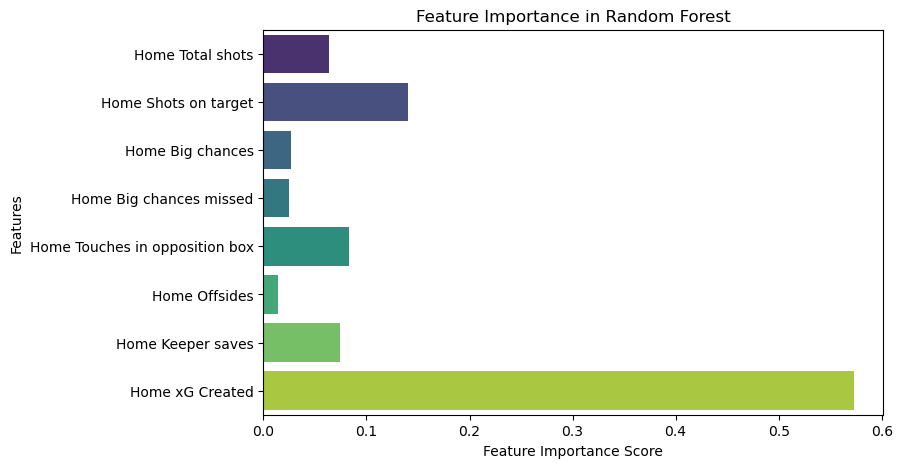

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = rfr.feature_importances_

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=X1_train_scaled.columns, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

## MODELLING TEST ON HOME GOALS DATA

In [90]:
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()

In [94]:
lr.fit(X1_train_scaled,y1_train)

LinearRegression()

In [96]:
y_pred = lr.predict(X1_test_scaled)

In [100]:
from sklearn.metrics import r2_score
print(r2_score(y1_test,y_pred))

-1.8912843728937871


In [102]:
lr2 = LinearRegression()

In [104]:
lr2.fit(X1_train,y1_train)

LinearRegression()

In [106]:
y_pred = lr.predict(X1_test)

In [108]:
print(r2_score(y1_test,y_pred))

-98.36494677832489


## STANDARDIZATION OF AWAY TEAM GOALS

In [111]:
scaler = StandardScaler()

scaler.fit(X2_train)

X2_train_scaled = scaler.transform(X2_train)

In [113]:
X2_test_scaled = scaler.transform(X2_test)

In [115]:
X2_train_scaled = pd.DataFrame(X2_train_scaled,columns=X2_train.columns)
X2_test_scaled = pd.DataFrame(X2_test_scaled,columns=X2_test.columns)

In [117]:
lr = LinearRegression()

In [119]:
lr.fit(X2_train_scaled,y2_train)

LinearRegression()

In [121]:
y_pred = lr.predict(X2_test_scaled)

In [123]:
print(r2_score(y2_test,y_pred))

0.44643881370855665


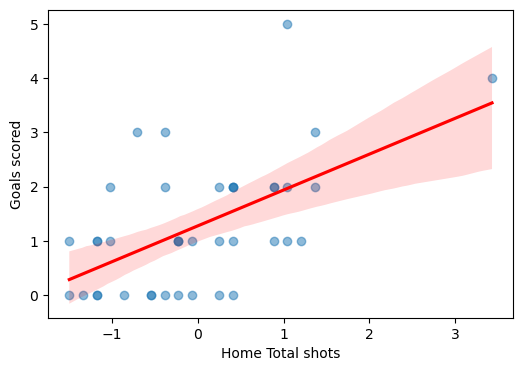

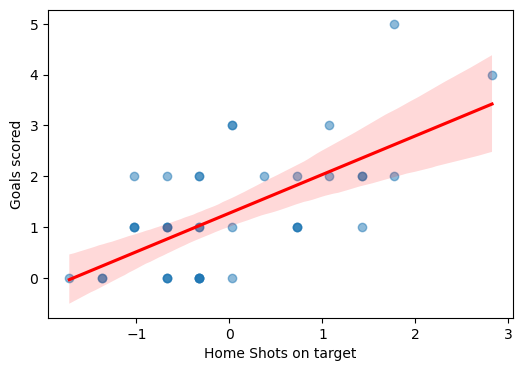

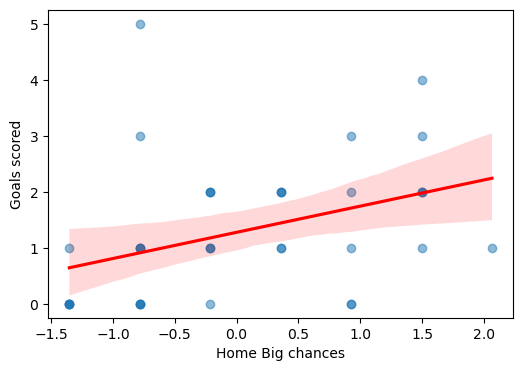

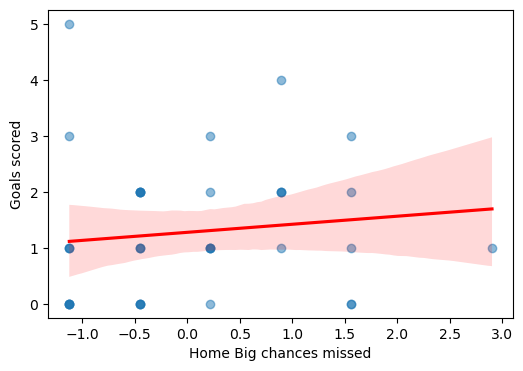

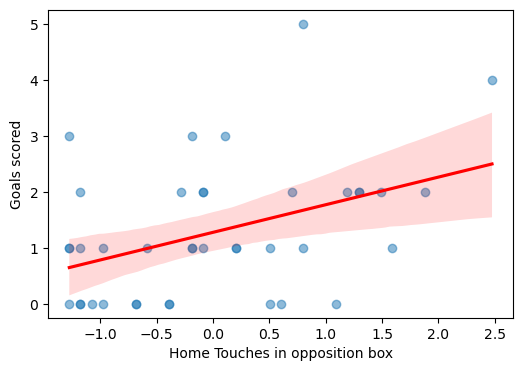

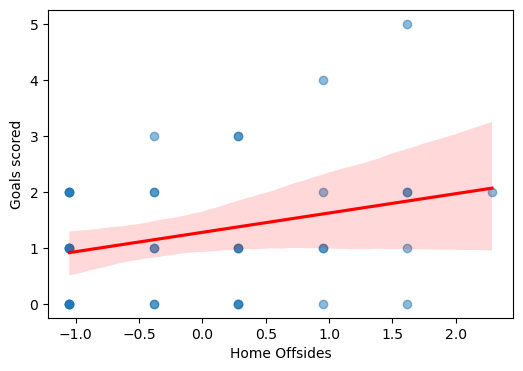

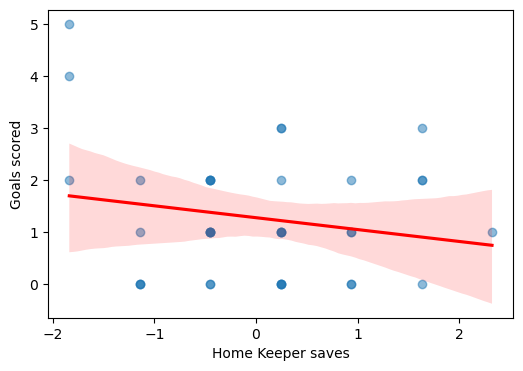

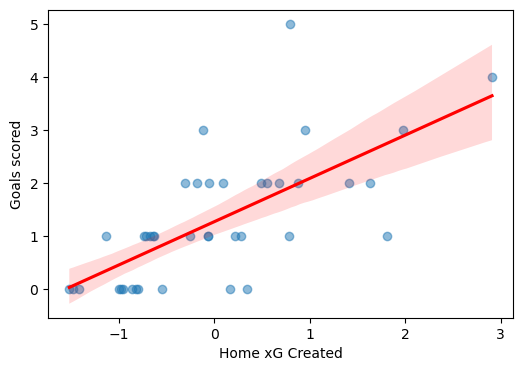

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in X1_train_scaled.columns:
    plt.figure(figsize=(6,4))
    sns.regplot(x=X1_train_scaled[column], y=y1_train, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
    plt.xlabel(column)
    plt.ylabel("Goals scored")
    plt.show()

In [142]:
with open('X1trainscaled.pkl','wb') as hometrainscaled:
    pickle.dump(X1_train_scaled,hometrainscaled)

In [169]:
with open('X1testscaled.pkl','wb') as hometestscaled:
    pickle.dump(X1_test_scaled,hometestscaled)

In [171]:
with open('X2trainscaled.pkl','wb') as awaytrainscaled:
    pickle.dump(X2_train_scaled,awaytrainscaled)

In [173]:
with open('X2testscaled.pkl','wb') as awaytestscaled:
    pickle.dump(X2_test_scaled,awaytestscaled)

In [175]:
with open('homegoalstrain.pkl','wb') as homegoalstrain:
    pickle.dump(y1_train,homegoalstrain)
with open('homegoalstest.pkl','wb') as homegoalstest:
    pickle.dump(y1_test,homegoalstest)

In [177]:
with open('awaysgoalstrain','wb') as awaygoalstrain:
    pickle.dump(y2_train,awaygoalstrain)
    
with open('awaygoalstest.pkl','wb') as awaygoalstest:
    pickle.dump(y2_test,awaygoalstest)

In [179]:
X1_test_scaled

,Home Total shots,Home Shots on target,Home Big chances,Home Big chances missed,Home Touches in opposition box,Home Offsides,Home Keeper saves,Home xG Created
0,1.044910,0.376109,-0.782923,-0.453094,1.488136,1.618691,-0.450965,0.055917
1,-0.385385,-0.323629,-0.213524,-0.453094,-0.683605,-1.051315,0.242827,-0.074581
2,0.091380,0.026240,-0.213524,-0.453094,-0.584889,0.283688,0.242827,-0.205080
3,-0.067542,-0.673498,-1.352322,-1.124345,1.389421,0.951190,-0.450965,-0.717970
4,0.727067,0.376109,0.355874,0.218156,0.500981,0.951190,1.630412,0.040743
5,0.885989,1.075847,1.494671,1.560658,3.363730,-0.383813,-0.450965,0.972442
6,-0.385385,-1.023367,-0.213524,0.218156,-1.078467,0.951190,0.242827,-0.575332
7,-1.179994,-1.023367,-0.782923,-0.453094,-1.078467,-1.051315,-0.450965,-0.890956
8,0.568145,0.026240,1.494671,1.560658,1.093274,0.283688,-1.838550,0.207660
9,-0.385385,-1.023367,0.925273,0.889407,-0.190027,-0.383813,0.242827,0.283531
